درخواست ۱۵:

یکی از مهم‌ترین مطالبی که باید مورد توجه شرکت لوتک قرار بگیرد آن است که در طول زمان سهم از بازار فروش برندهای مختلف دچار تغییر شده؟ برند اول از نظر تعداد فروش چه لپتاپی بوده است؟ آیا با گذشت سال‌ها این ترتیب برندها تغییری کرده است؟

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
all_data = pd.read_csv('sales_data.csv')

In [10]:
all_data[['year', 'month', 'day']] = all_data.Order_Date.str.split("-",expand=True)
all_data['year']=all_data['year'].astype('int')
all_data['month']=all_data['month'].astype('int')
all_data['day']=all_data['day'].astype('int')


all_data = all_data.loc[((all_data['month']<7) & (all_data['year']==1402)) | (all_data['year']<1402)]
all_data = all_data.loc[((all_data['month']>10) & (all_data['year']==1390)) | (all_data['year']>1390)]

In [11]:
pop_brand=all_data.groupby(['year','month','Manufacturer']).sum()[['Quantity']].reset_index()


In [12]:
all_brand=all_data.groupby(['year','month']).sum()['Quantity'].reset_index()
all_brand.rename(columns={'Quantity':'all_Quantity'},inplace=True)
brand_perc_data = pd.merge(pop_brand, all_brand,how='inner',on=['year','month'])
brand_perc_data['Quantity_perc'] = brand_perc_data['Quantity']/brand_perc_data['all_Quantity']*100

پس نمودار سهم از بازار ۸ برند اول از نظر تعداد فروش ماهانه را رسم می‌کنیم:

([<matplotlib.axis.XTick at 0x12f71f810>,
 [Text(0, 0, '139011'),
  Text(5, 0, '13914'),
  Text(10, 0, '13919'),
  Text(15, 0, '13922'),
  Text(20, 0, '13927'),
  Text(25, 0, '139212'),
  Text(30, 0, '13935'),
  Text(35, 0, '139310'),
  Text(40, 0, '13943'),
  Text(45, 0, '13948'),
  Text(50, 0, '13951'),
  Text(55, 0, '13956'),
  Text(60, 0, '139511'),
  Text(65, 0, '13964'),
  Text(70, 0, '13969'),
  Text(75, 0, '13972'),
  Text(80, 0, '13977'),
  Text(85, 0, '139712'),
  Text(90, 0, '13985'),
  Text(95, 0, '139810'),
  Text(100, 0, '13993'),
  Text(105, 0, '13998'),
  Text(110, 0, '14001'),
  Text(115, 0, '14006'),
  Text(120, 0, '140011'),
  Text(125, 0, '14014'),
  Text(130, 0, '14019'),
  Text(135, 0, '14022'),
  Text(140, 0, '')])

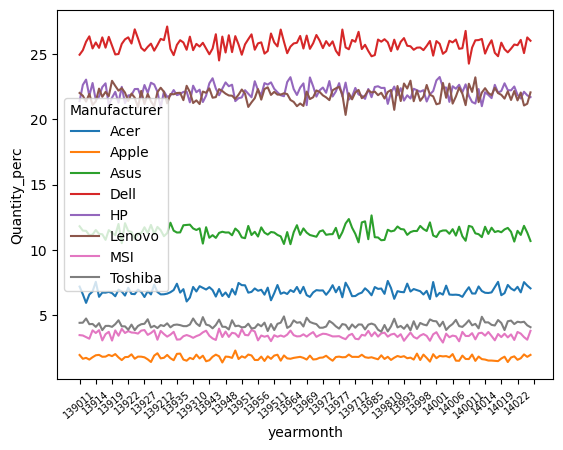

In [15]:
brand_perc_data['year'] = brand_perc_data['year'].astype('str')
brand_perc_data['month'] = brand_perc_data['month'].astype('str')
brand_perc_data['yearmonth'] = brand_perc_data['year']+brand_perc_data['month']

brand_perc_data = brand_perc_data.loc[(brand_perc_data['Manufacturer']=='Dell') | (brand_perc_data['Manufacturer']=='HP') | (brand_perc_data['Manufacturer']=='Lenovo') | (brand_perc_data['Manufacturer']=='Asus') | (brand_perc_data['Manufacturer']=='Acer') | (brand_perc_data['Manufacturer']=='Apple') | (brand_perc_data['Manufacturer']=='Toshiba') | (brand_perc_data['Manufacturer']=='MSI')]

sns.lineplot(data=brand_perc_data, x="yearmonth", y="Quantity_perc",hue='Manufacturer')
plt.xticks(range(0,142,5), rotation=40,fontsize=7)

جالب است که در طول زمان این سهم بازار بسیار دارای ثبات بوده است. و نیاز به نگرانی از بابت تغییر سهم بسیار زیاد در بازار وجود ندارد. البته این مشاهده نیاز به بررسی بیشتر دارد چون مممکن است این ثبات به دلیل ویژگی‌ها و سیاست‌های خاص شرکت لوتک بوده باشد